Aim to complete parts of this tutorial on your own *before* the practical session (after the lecture).

Use the practical session to get help for any aspect you do not understand or were unable to complete.

# Clustering 2

Learning objectives
1. Apply GMM and DBSCAN (density-based clustering) to different data sets and interpret the outputs using the popular python library [sklearn](https://scikit-learn.org/stable/)
2. Interpret the results to learn about the data structure
3. Explore differences based on changing clustering parameters
4. Visualise the clustering results

Optional learning objective (view the video online about OPTICS before you start)

5. Apply OPTICS (extension of DBSCAN) to different data sets, interpret the results, explore differences and visualise the results

## Import specific packages and functions

In [2]:
# IMPORTS
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, SparsePCA, KernelPCA
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE, MDS
from sklearn import metrics
import umap
import warnings
warnings.simplefilter('ignore', category=FutureWarning)
import seaborn as sns

## Load in dataset

In [3]:
# read in the dataset
covid19_proteomics = pd.read_excel('../Data-main/COVID19_proteomics.xlsx')

# Scale the data with standard scaling (0 mean and unit variance)
covid19_proteomics_scaled = StandardScaler().fit_transform(covid19_proteomics.iloc[:, 3:])

# Create a dataframe with adenoma/carcinoma status and the scaled data
scaled_df = pd.DataFrame(covid19_proteomics_scaled)
scaled_df['COVID19'] = covid19_proteomics.COVID19

## Gaussian Mixture Models (GMM)

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians. Read more [here](https://scikit-learn.org/stable/modules/mixture.html).

We will use the [`sklearn.mixture.GaussianMixture()`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) object to fit the model. Similar to dimensionality reduction and other clustering methods, one of the parameters to set for GMM models is the `n_components` (number of components). Another parameter is the `covariance_type` which can be one of the following options: 
- ‘full’: each component has its own general covariance matrix
- ‘tied’: all components share the same general covariance matrix
- ‘diag’: each component has its own diagonal covariance matrix
- ‘spherical’: each component has its own single variance

Here we will fit a GMM model and explore through visualisations how 

In [4]:
# enter your CID here, or date of birth, or another number of your choosing to use as random state
CID = 0

# remember to check the documentation of each algorithm if setting the random_state is needed
# for this tutorial and all upcoming tutorials...

In [5]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df.iloc[:,:-1], scaled_df.COVID19, test_size=0.2, random_state=CID)

C:\Users\jmp111\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

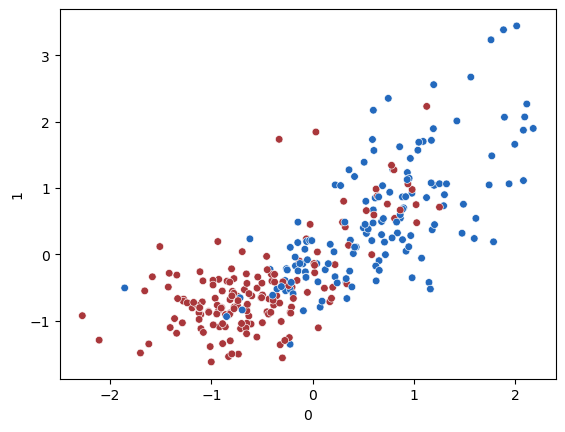

In [7]:
# fit a Gaussian Mixture Model with two components
gmm = GaussianMixture(n_components=2, covariance_type="full")
y_pred = gmm.fit_predict(X_train)

# here we take the first 2 proteomic features for the x and y axis 
sns.scatterplot(x=X_train.iloc[:, 0], y=X_train.iloc[:, 1], c=y_pred, s=30, cmap='vlag')


We can use PCA or another dimensionality reduction method (see previous tutorials on dimension reduction) to create components that encopass information from all our variables, and not just 2 random variables we select for visualisation.

After we visualise the PCA results with the current GMM model, we will explore the different covariance options and how (or if) they change our clusters.


<Axes: >

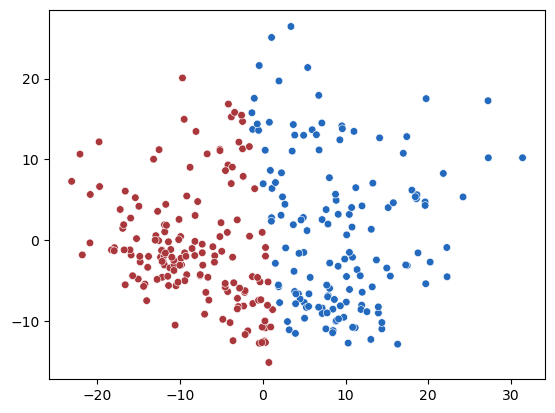

In [8]:
pca = PCA(n_components=2)
pca_df = pca.fit_transform(X_train)
sns.scatterplot(x=pca_df[:, 0], y=pca_df[:, 1], c=y_pred, s=30, cmap='vlag')

C:\Users\jmp111\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jmp111\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jmp111\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jmp111\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Wi

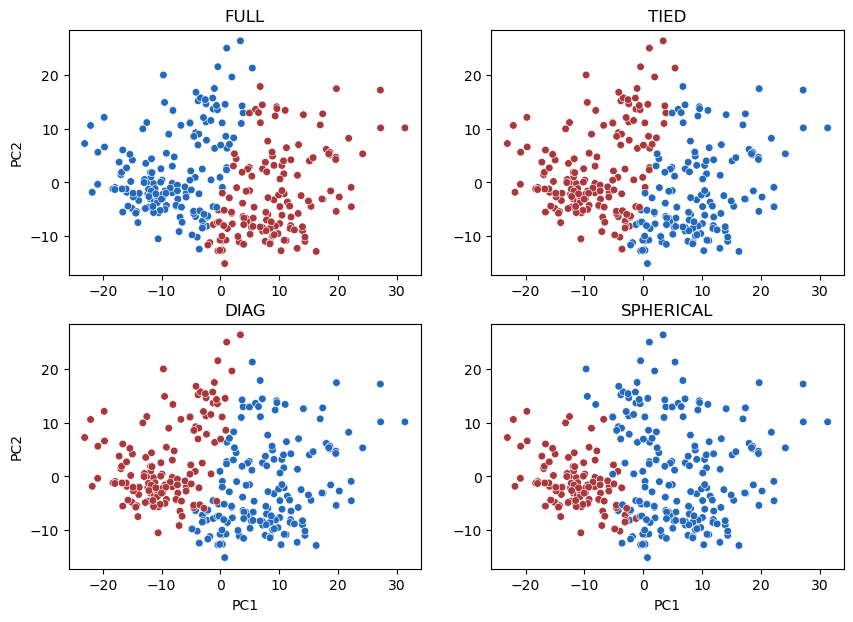

In [10]:
# function for fitting GMM models with the 4 different covariance options
def test_gmm_covariance (cov):
    gmm = GaussianMixture(n_components=2, covariance_type=cov)
    y_pred = gmm.fit_predict(X_train)
    #pca = PCA(n_components=2)
    #pca_df = pca.fit_transform(X_train)
    return y_pred

cov_list = ['full', 'tied', 'diag', 'spherical']

# creating subplots 
plt.figure(figsize=(10,7))
for n, cov_type in enumerate(cov_list):
    ax = plt.subplot(2, 2, n+1)
    sns.scatterplot(x=pca_df[:, 0], y=pca_df[:, 1], 
                    c=test_gmm_covariance(cov_type), s=30, cmap='vlag', ax=ax)
    ax.set_title(cov_type.upper())
    if n>1:
        ax.set_xlabel("PC1")
    if (n % 2) == 0:
        ax.set_ylabel("PC2")
    

### Compare the result from GMM with k-Means with 2 clusters

In [ ]:
# Your code goes here, reuse materials from BIDS 5

# Initialise a k-Means model

# Fit a k-Means model to X_train

# Plot the results side to side with GMM as comparison (use subplot similar to the above example)


How are these two methods (GMM and k-Means) similar? When do you observe differences?

## Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

DBSCAN is a density-based clustering non-parametric algorithm. Given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbours - this should ring a bell about a method from BIDS 5), marking as outliers points that lie alone in low-density regions (whose nearest neighbours are too far away). Original paper found [here](https://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.121.9220).

We will use the [`sklearn.cluster.DBSCAN()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN) object to fit our model. Below are some of the parameters that will need to be set, you will notice they are similar to other clustering techniques (i.e. k-means): 

- `eps`: The maximum distance between two samples for one to be considered as in the neighbourhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.
- `min_samples`: The number of samples (or total weight) in a neighbourhood for a point to be considered as a core point. This includes the point itself.
- `metric`: The metric to use when calculating distance between instances in a feature array.

Before fitting our DBSCAN model we will examine the best values for epsilon by using the `NearestNeighbors` function. After plotting the distances we get, we will find the optimal value for epsilon at the point of maximum curvature:

<Axes: >

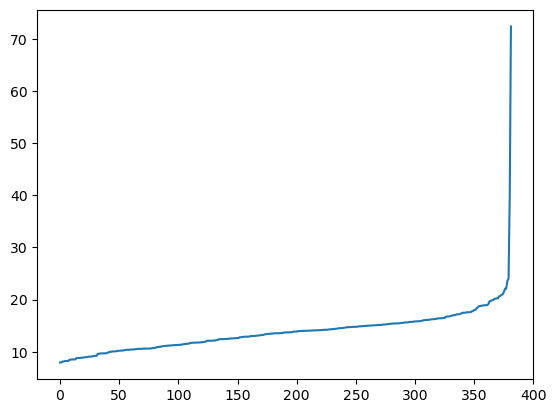

In [11]:
NN = NearestNeighbors(n_neighbors=2)
nbrs = NN.fit(scaled_df.iloc[:, :-1])
distances, indices = nbrs.kneighbors(scaled_df.iloc[:, :-1])

distances = np.sort(distances, axis=0)
distances = distances[:,1]
# plt.plot(distances)
sns.lineplot(data=distances)

In [12]:
dbscan = DBSCAN(
    eps=19, 
    min_samples=3, 
    metric='euclidean'
).fit(scaled_df.iloc[:, :-1])

labels = dbscan.labels_
n_clusters_ = len(set(labels))
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(scaled_df.iloc[:, -1], labels))
print("Completeness: %0.3f" % metrics.completeness_score(scaled_df.iloc[:, -1], labels))
print("Silhouette coefficient: %0.3f" % metrics.silhouette_score(scaled_df.iloc[:, :-1], labels))

Estimated number of clusters: 2
Estimated number of noise points: 66
Homogeneity: 0.049
Completeness: 0.068
Silhouette Coefficient: 0.172


Text(0, 0.5, 'tSNE 2')

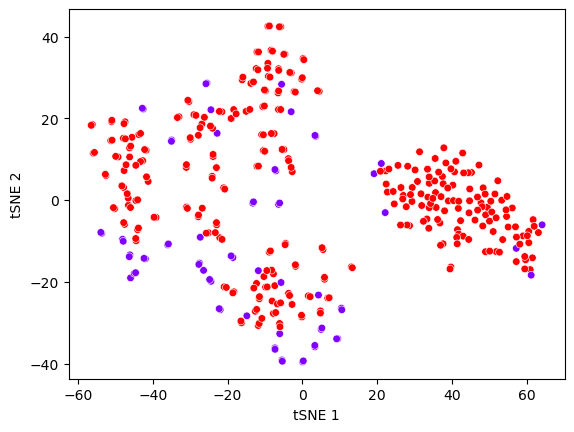

In [14]:
tsne_df = TSNE(
    n_components=2, 
    perplexity=10,
).fit_transform(scaled_df.iloc[:, :-1]) # don't forget you should optimise the t-SNE parameters as well (see BIDS 4)

ax = sns.scatterplot(x=tsne_df[:, 0], y=tsne_df[:, 1], c=labels, s=30, cmap='rainbow')
ax.set_xlabel("tSNE 1")
ax.set_ylabel("tSNE 2")

As you can see the clusters found by DBSCAN don't really correspond to the t-SNE visualisations. Why do you think this is? Think about the data that is used as input for both methods.

Now, try reducing the dimensions of the dataset with PCA and see if your results are more informative if you use the PCA scores (or another dimension reduction method) as input to DBSCAN. Alternatively, use the coordinates output from t-SNE as input to DBSCAN as well. Make sure to also tweak the parameters of the DBSCAN model to check how sensitive it is to even small changes! You can also rerun the GMM models with t-SNE or kernel t-SNE decompositions and look at how the visualisations change.

Feel free to utilise and modify the code in the cell below to do a side-to-side comparison of the parameter you are changing. The example below still uses t-SNE as the dimensionality reduction method, make sure whichever method you pick that you set the same `random_state` parameter (to your CID), so that the embeddings are the same across all iterations.

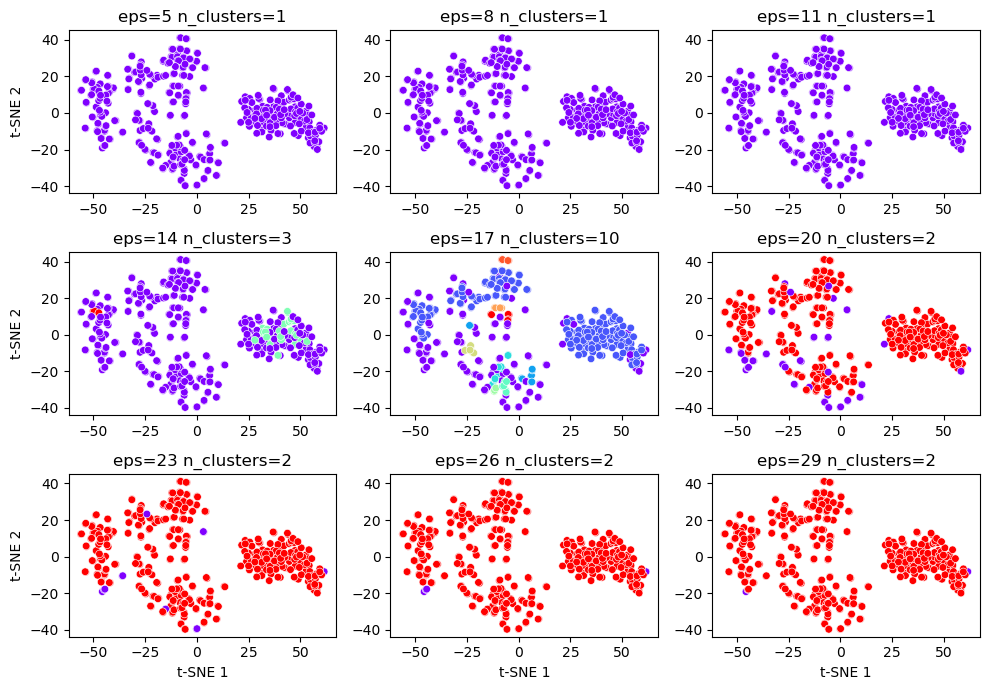

In [15]:
def test_dbscan(eps):
    dbscan = DBSCAN(
    eps=eps, 
    min_samples=3, 
    metric='euclidean', 
).fit(scaled_df.iloc[:, :-1]) # uses the original data
    
    labels = dbscan.labels_
    return labels

tsne_df = TSNE(
    n_components=2, 
    perplexity=10,
    random_state=CID,
).fit_transform(scaled_df.iloc[:, :-1]) # uses the original data

eps_values = np.arange(5, 30, 3)

# creating subplots 
plt.figure(figsize=(10,7))
for n, eps in enumerate(eps_values):
    ax = plt.subplot(3, 3, n+1)
    tdb = test_dbscan(eps)
    sns.scatterplot(x=tsne_df[:, 0], y=tsne_df[:, 1], 
                    c=tdb, s=30, cmap='rainbow', ax=ax)
    ax.set_title('eps='+str(eps)+' n_clusters='+str(len(set(tdb))))
    if (n % 3) == 0:
        ax.set_ylabel("t-SNE 2")
    if n>5:
        ax.set_xlabel("t-SNE 1")
plt.tight_layout()

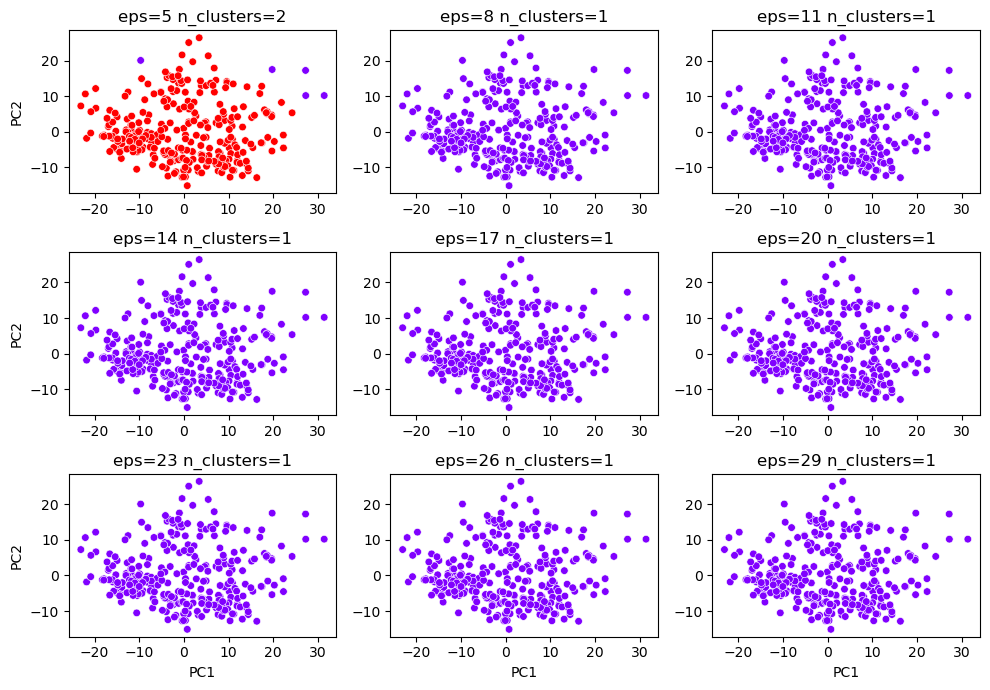

In [16]:
pca = PCA(n_components=2)
pca_df = pca.fit_transform(X_train)

def test_dbscan2(eps):
    dbscan = DBSCAN(
    eps=eps, 
    min_samples=3, 
    metric='euclidean', 
    ).fit(pca_df)
    
    labels = dbscan.labels_
    return labels

eps_values = np.arange(5, 30, 3)

# creating subplots 
plt.figure(figsize=(10,7))
for n, eps in enumerate(eps_values):
    ax = plt.subplot(3, 3, n+1)
    tdb = test_dbscan2(eps)
    sns.scatterplot(x=pca_df[:, 0], y=pca_df[:, 1],
                    c=tdb, s=30, cmap='rainbow', ax=ax)
    ax.set_title('eps='+str(eps)+' n_clusters='+str(len(set(tdb))))
    if (n % 3) == 0:
        ax.set_ylabel("PC2")
    if n>5:
        ax.set_xlabel("PC1")
plt.tight_layout()


Text(0, 0.5, 'PC2')

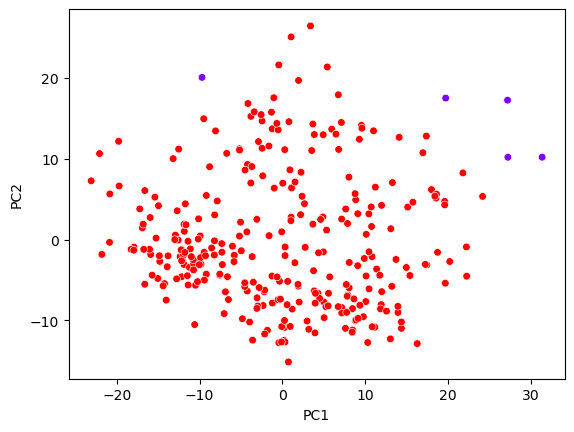

In [17]:
labels = test_dbscan2(5)

ax = sns.scatterplot(x=pca_df[:, 0], y=pca_df[:, 1], c=labels, s=30, cmap='rainbow')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

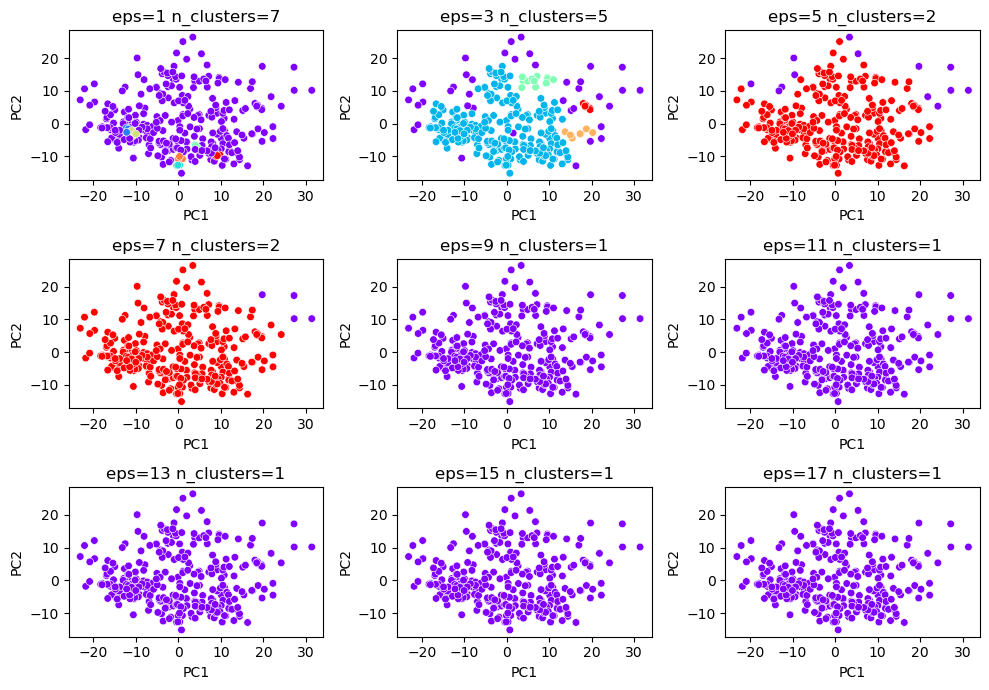

In [24]:
pca = PCA(n_components=2)
pca_df = pca.fit_transform(X_train)

def test_dbscan3(eps):
    dbscan = DBSCAN(
    eps=eps, 
    min_samples=4, 
    metric='manhattan', 
    ).fit(pca_df)
    
    labels = dbscan.labels_
    return labels

eps_values = np.arange(1, 19, 2)

# creating subplots 
plt.figure(figsize=(10,7))
for n, eps in enumerate(eps_values):
    ax = plt.subplot(3, 3, n+1)
    sns.scatterplot(x=pca_df[:, 0], y=pca_df[:, 1], c=test_dbscan3(eps), s=30, cmap='rainbow', ax=ax)
    ax.set_title('eps='+str(eps)+' n_clusters='+str(len(set(test_dbscan3(eps)))))
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
plt.tight_layout()

# Optional materials
Please view the [video](https://youtu.be/xlqsYUXDuOk) online about OPTICS before you start this part of the tutorial.

## Ordering Points To Identify the Clustering Structure (OPTICS)

OPTICS, closely related to DBSCAN, finds core sample of high density and expands clusters from them.  Unlike DBSCAN, OPTICS keeps cluster hierarchy for a variable neighbourhood radius. The sklearn [OPTICS](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html) function is better suited for usage on large datasets than the current sklearn implementation of DBSCAN. Clusters are then extracted using a DBSCAN-like method (```cluster_method``` = ‘dbscan’) or an automatic technique (```cluster_method``` = ‘xi’). This implementation deviates from the original OPTICS by first performing k-nearest-neighbourhood (kNN, BIDS 5) searches on all points to identify core sizes, then computing only the distances to unprocessed points when constructing the cluster order. Note that we do not employ a heap to manage the expansion candidates, so the time complexity will be O(n^2). The original methodology paper can be found [here](https://dl.acm.org/doi/10.1145/304181.304187). Below are some parameters we will be changing today: 

- `min_samples`: The number of samples in a neighbourhood for a point to be considered as a core point.
- `max_eps`: The maximum distance between two samples for one to be considered as in the neighbourhood of the other. Default value of `np.inf` will identify clusters across all scales; reducing `max_eps` will result in shorter run times.
- `metric`: Metric to use for distance computation, default here is '_minkowski_' as opposed to Euclidean in DBSCAN.
- `p`: Parameter for the Minkowski metric from pairwise_distances. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

In [25]:
optics = OPTICS(
    min_samples=3, 
    max_eps=np.inf,
    p=4
).fit(scaled_df.iloc[:, :-1])

labels = optics.labels_
n_clusters_ = len(set(labels))
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(scaled_df.iloc[:, -1], labels))
print("Completeness: %0.3f" % metrics.completeness_score(scaled_df.iloc[:, -1], labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(scaled_df.iloc[:, :-1], labels))

Estimated number of clusters: 4
Estimated number of noise points: 371
Homogeneity: 0.027
Completeness: 0.105
Silhouette Coefficient: -0.198


In [ ]:
def dim_reduction(method):
    df = method.fit_transform(scaled_df.iloc[:, :-1])
    sns.scatterplot(x=df[:, 0], y=df[:, 1], c=labels, s=30, cmap='Dark2')
    plt.title(method)
    plt.show()

dim_reduction(MDS(n_components=2, metric=True))
dim_reduction(TSNE(n_components=2, perplexity=30))
dim_reduction(umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.5))